<a href="https://colab.research.google.com/github/RubenCedillo123/Machine-Learning/blob/main/ClaseMnistRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Librerías***

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# ***2. Árboles y bosques para el conjunto MNIST***

In [ ]:
dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"]

df = pd.DataFrame(X)
df["target"] = y
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


cuantos dígitos hay?

In [ ]:
df = df.astype(int)
df.target.value_counts()

,count
target,
1,7877
7,7293
3,7141
2,6990
9,6958
0,6903
6,6876
8,6825
4,6824


In [ ]:
y = y.astype(int)

Forma de X: (70000, 784)
Forma de y: (70000,)
Dígitos únicos: [0 1 2 3 4 5 6 7 8 9]


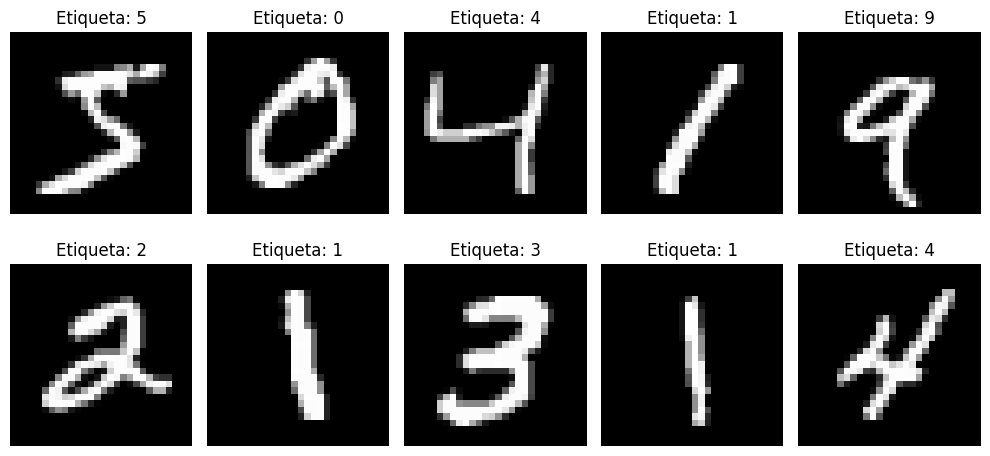

In [ ]:
# Cargar el dataset MNIST
dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"].astype(int)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Dígitos únicos:", np.unique(y))

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Etiqueta: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

seleccionar solo los primeros 2000

In [ ]:
df_2000 = df.iloc[:2000]
df_2000

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_2000.drop("target", axis=1), df_2000["target"], test_size=0.25, random_state=123)

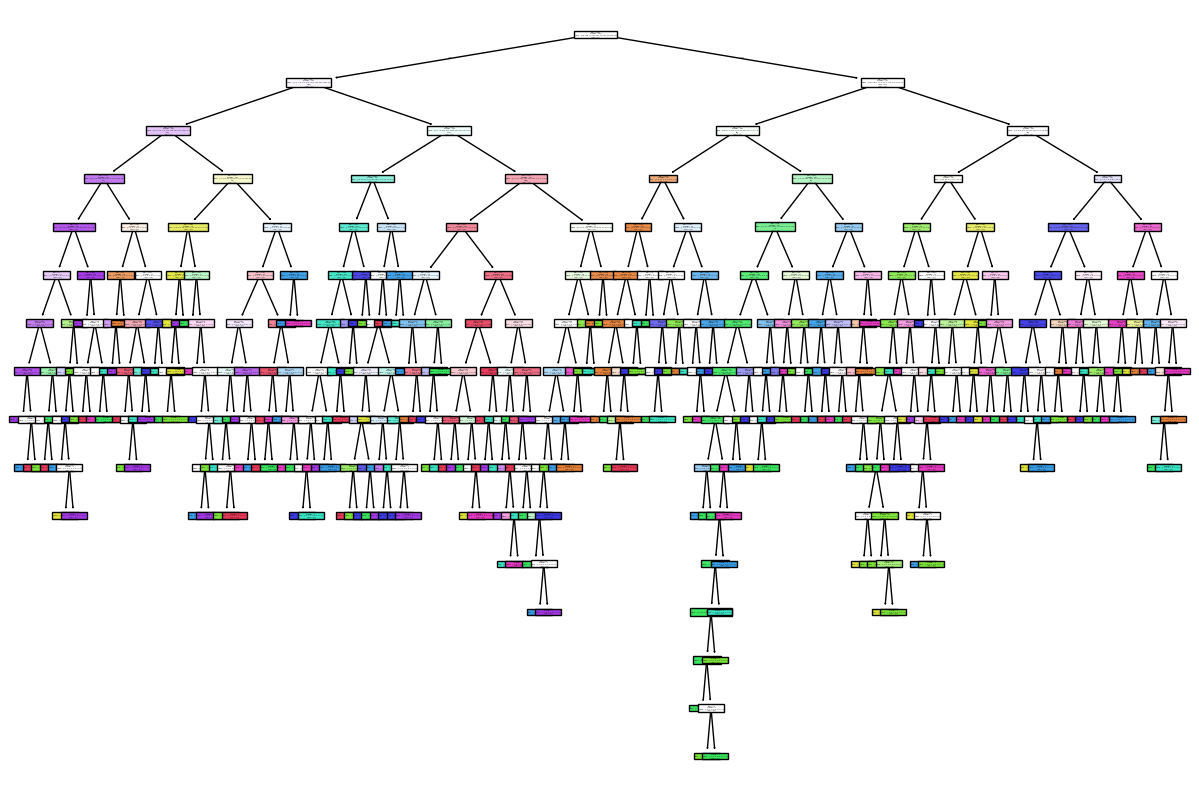

In [ ]:
clf_1 = DecisionTreeClassifier(random_state=123)
clf_1.fit(X_train_1, y_train_1)

plt.figure(figsize=(15, 10))
plot_tree(clf_1, filled=True, feature_names=df_2000.columns[:-1], class_names=True)
plt.show()

In [ ]:
X_small = X[:2000]
y_small = y[:2000]
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=500, random_state=42)

arbol de decisión

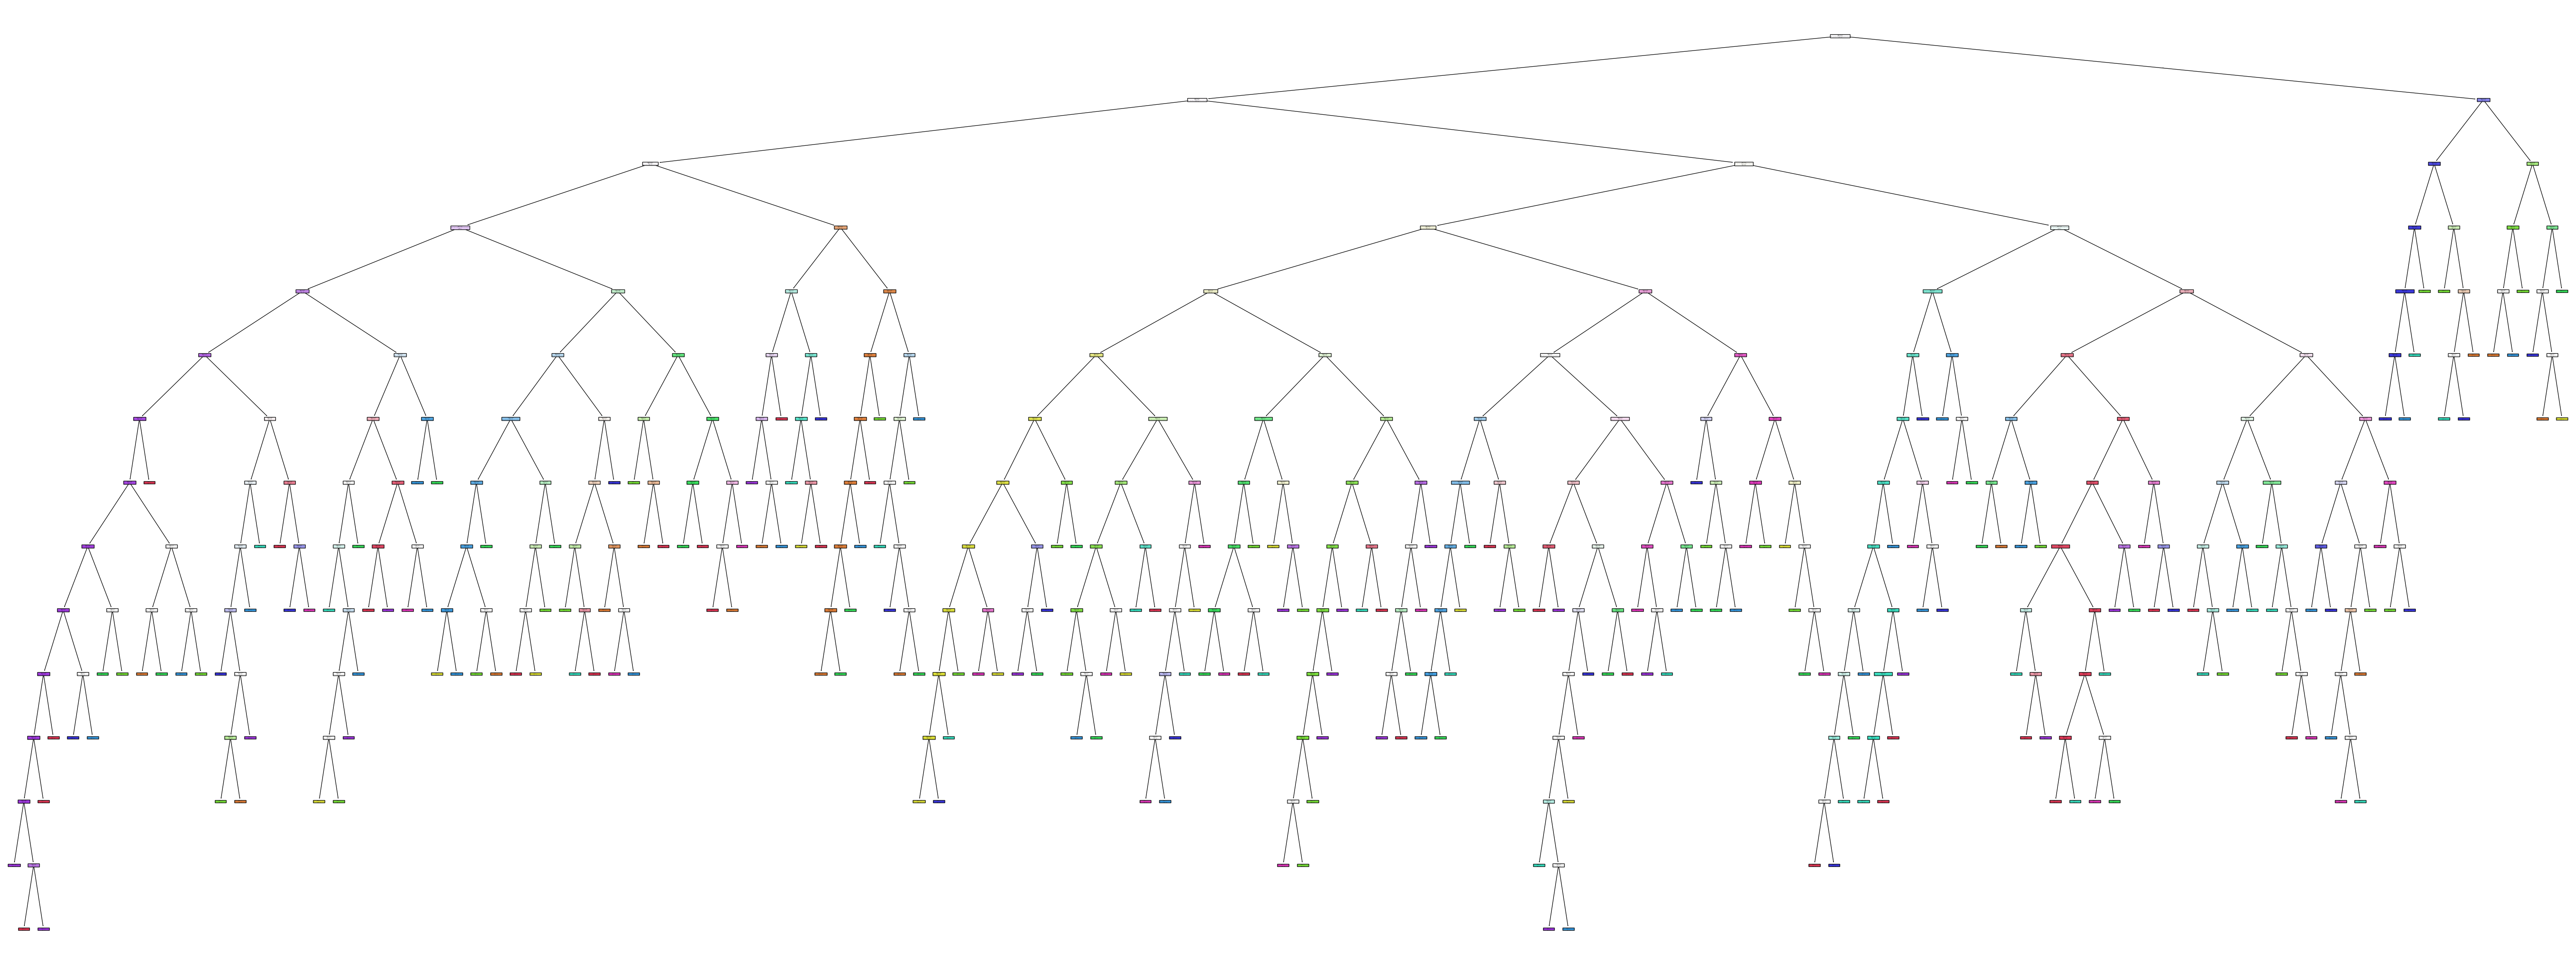

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(80, 30))
plot_tree(clf, filled=True, feature_names=df_2000.columns[:-1], class_names=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.722


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

NameError: name 'X_train' is not defined

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.916


importancias

In [ ]:
# Define a list containing the desired number of trees (n_estimators) for each iteration
arboles = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for num_trees in arboles:
    rf_clf = RandomForestClassifier(n_estimators=num_trees, random_state=42) # Use num_trees directly
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo con {num_trees} árboles:", accuracy)

Precisión del modelo con 10 árboles: 0.834
Precisión del modelo con 20 árboles: 0.868
Precisión del modelo con 30 árboles: 0.878
Precisión del modelo con 40 árboles: 0.9
Precisión del modelo con 50 árboles: 0.902
Precisión del modelo con 60 árboles: 0.902
Precisión del modelo con 70 árboles: 0.912
Precisión del modelo con 80 árboles: 0.91
Precisión del modelo con 90 árboles: 0.908
Precisión del modelo con 100 árboles: 0.916


In [ ]:
importancias = rf_clf.feature_importances_

racomodar el arreglo en 28x28

In [ ]:
importances_reshaped = importancias.reshape(28, 28)

los dibujamos

<Axes: >

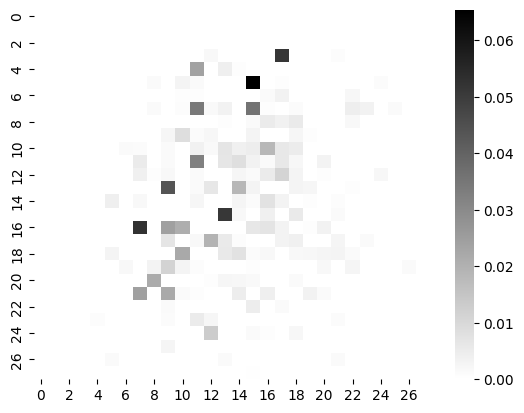

In [ ]:
import seaborn as sns
feature_importances = clf.feature_importances_  # Access feature importances directly
sns.heatmap(np.reshape(feature_importances, (28, 28)), cmap='binary')

In [ ]:
rf_clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.99480234e-05, 0.00000000e+00,
       6.19289774e-05, 0.00000000e+00, 6.50314928e-05, 1.41145189e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Entrenar solo sobre el 0

In [ ]:
df_0 = df[df["target"] == 0]
df_0

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dividimos el data set

In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(df_0.drop("target", axis=1), df_0["target"], test_size=0.25, random_state=123)

rf_clf_0 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf_0.fit(X_train_0, y_train_0)

y_pred_0 = rf_clf_0.predict(X_test_0)
accuracy_0 = accuracy_score(y_test_0, y_pred_0)
print("Precisión del modelo:", accuracy_0)

Precisión del modelo: 1.0


In [ ]:
rf_clf_0.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

visualizar|

<Axes: >

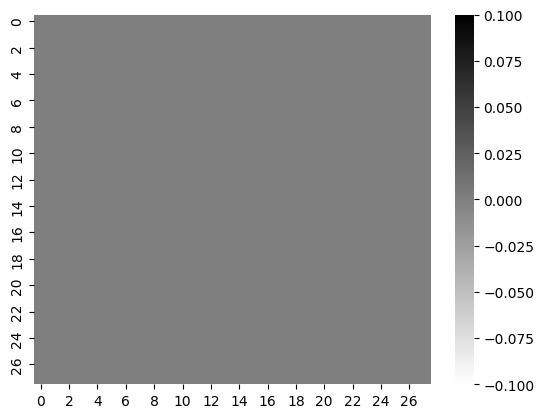

In [ ]:
feature_importances = rf_clf_0.feature_importances_  # Access feature importances directly
sns.heatmap(np.reshape(feature_importances, (28, 28)), cmap='binary')

intento 2


entrena sobre todos los digitos, testea sobre el 0

In [ ]:
rf_clf_0 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf_0.fit(X_train, y_train)

y_pred_0 = rf_clf_0.predict(X_test_0)
accuracy_0 = accuracy_score(y_test_0, y_pred_0)
print("Precisión del modelo:", accuracy_0)

Precisión del modelo: 0.9681344148319815


In [ ]:
rf_clf_0.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.91501477e-05, 1.33337004e-05,
       9.06589556e-06, 0.00000000e+00, 1.73052899e-05, 9.07583121e-06,
       0.00000000e+00, 0.00000000e+00, 1.85564458e-06, 5.89267401e-06,
       9.88624882e-07, 7.61498117e-06, 4.08059009e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<Axes: >

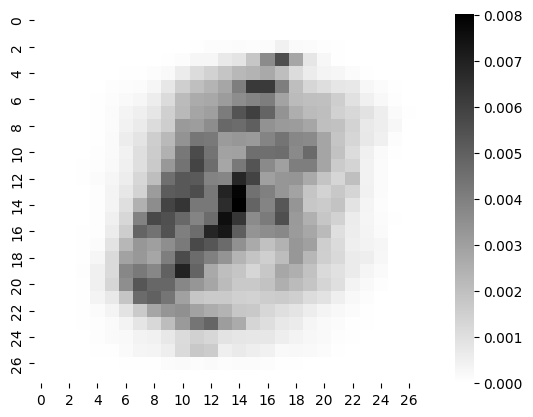

In [ ]:
sns.heatmap(np.reshape(rf_clf_0.feature_importances_, (28, 28)), cmap='binary')

realizamos el mismo procedimiento para todos los digitos

In [ ]:
for i in range(10):
    df_i = df[df["target"] == i]

for i in range(10):
  rf_i = RandomForestClassifier(n_estimators=1000, random_state=42)
  rf_i.fit(X_train, y_train)

  y_pred_i = rf_i.predict(X_test)
  accuracy_i = accuracy_score(y_test, y_pred_i)
  print("Precisión del modelo:", accuracy_i)

Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924
Precisión del modelo: 0.924


busca la diferencia entre 0 y 1, usando mascara

In [ ]:
mask_01 = (y == 0) | (y ==1)
X_01 = X[mask_01]
y_01 = y[mask_01]

X_01_small = X_01[:2000]
y_01_small = y_01[:2000]

X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01_small, y_01_small, test_size=0.25, random_state=42)

rf_clf_01 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf_01.fit(X_train, y_train)

y_pred_01 = rf_clf_01.predict(X_test_01)
accuracy_01 = accuracy_score(y_test_01, y_pred_01)
print("Precisión del modelo:", accuracy_01)

rf_clf_01.feature_importances_

Precisión del modelo: 0.984


In [ ]:
importances_01 = rf_clf_01.feature_importances_
sns.heatmap(np.reshape(importances_01, (28, 28)), cmap='binary')

NameError: name 'rf_clf_01' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def cargar_imagen(path):
  img = Image.open(path).convert("L")
  img = img.resize((28, 28))
  img_array = np.array(img)
  if img_array.mean() > 127:
    img_array = 255 - img_array
    img_flat = img_array.reshape(1, -1)
  return img_flat, img_array

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/numero3.jpg"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def cargar_imagen(path):
  img = Image.open(path).convert("L")
  img = img.resize((28, 28))
  img_array = np.array(img)
  img_flat = img_array.reshape(1, -1) # Define img_flat outside the if statement
  if img_array.mean() > 127:
    img_array = 255 - img_array
    img_flat = img_array.reshape(1, -1) # Reassign if condition is True
  return img_flat, img_array # Now img_flat is always defined

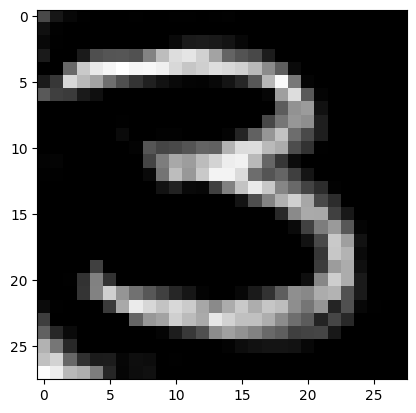

In [ ]:
X_personal, img_vis = cargar_imagen(path)
plt.imshow(img_vis, cmap='gray')

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/Imagen de WhatsApp 2025-04-01 a las 13.10.53_98a5b829.jpg"

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/2.jpg"

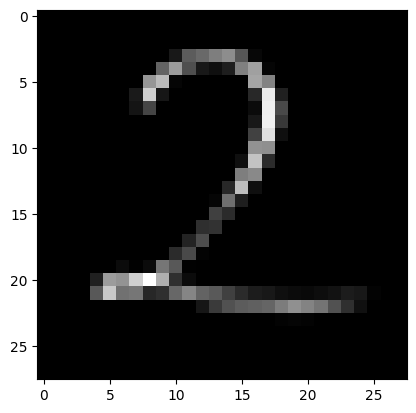

In [ ]:
X_personal, img_vis = cargar_imagen(path)
plt.imshow(img_vis, cmap='gray')


In [ ]:
X_small = X[:2000]
y_small = y[:2000]
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=500, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Precisión del modelo:", accuracy_dt)

Precisión del modelo: 0.722


In [ ]:
prediccion = rf_clf.predict(X_personal)
print(prediccion)

[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
